## Oscilateur harmonique libre et amorti (ou non)

Nous considérons l'oscilateur harmonique libre et amorti.

Une masse $m$ est accrochée à un ressort de constante de raideur $k$ et écartée de sa position d'équilibre de $x_0$, puis lâchée avec une vitesse initiale $v_0$.

La masse est plongée dans un fluide et le coefficient de frottement visquex laminaire est $b_l$

$$\Omega_0=\sqrt{k/m}$$

$$T_0=2\pi/\Omega_0$$

$$\gamma=(b_l/2m)$$

L'équation différentielle du mouvement est:

$$\ddot x (t) + 2 \gamma \dot x(t) +\Omega_0^2 x(t) = 0$$

l'équation caractéristique associée est

$$x^2+2\gamma x+\Omega_0^2=0$$

son déterminant réduit est $\Delta '=(\gamma^2-\Omega_0^2)$

Si $\Delta ' \neq 0$, les racines de l'équation sont:

$$\gamma_1=-\gamma +(\Delta ')^{0.5}$$

$$\gamma_2=-\gamma -(\Delta ')^{0.5}$$

Les solutions de l'équadiff sont alors de la forme

$$x_c(t)=C_1 e^{\gamma_1 t}+C_2 e^{\gamma_2 t}$$

Les conditions initiales donnent 
$$C_1=\frac{\gamma_2 x_0 - v_0}{\gamma_2-\gamma_1}$$

$$C_2=\frac{\gamma_1 x_0 - v_0}{\gamma_1-\gamma_2}$$

La solution physique est la partie réelle de $x_c$.

Si $\Delta ' = 0$, la solution est la partie réelle de:

$$x_c(t)=[x_0+(v_0+\gamma x_0)t ]e^{-\gamma t}$$

some more texte

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cmath import *

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
def omega0(k,m):
    oz=np.sqrt(k/m)
    return oz

def gamma(bl,m):
    ga=bl/(2*m)
    return ga

def deltaprime(k,m,bl):
    dp=gamma(bl,m)**2-omega0(k,m)**2+0j
    return dp

def osciamo(k,m,bl,xzero,vzero,t):
    if (deltaprime(k,m,bl)!=0):
        gamma1=-gamma(bl,m)+deltaprime(k,m,bl)**(1/2)
        gamma2=-gamma(bl,m)-deltaprime(k,m,bl)**(1/2)
        C1=(gamma2*xzero-vzero)/(gamma2-gamma1)
        C2=(gamma1*xzero-vzero)/(gamma1-gamma2)
        solc=C1*np.exp(gamma1*t)+C2*np.exp(gamma2*t)
        sol=solc.real
    else:
        sol=(xzero+(vzero+gamma(bl,m)*xzero)*t)*np.exp(-gamma(bl,m)*t)
    return sol    
    

In [3]:
def osciplo(k,m,bl,xzero,vzero):
#    omega0=np.sqrt(k/m)
#    gamma=bl/(2*m)
#    deltaprime=gamma**2-omega0**2+0j
    t = np.linspace(0,40,1000)
    xdet=[]
    for i in t:
        xdet.append(osciamo(k,m,bl,xzero,vzero,i))

    matplotlib.rcParams['figure.figsize'] = (12,4)
    plt.plot(t,xdet,lw=3)
    plt.grid(True)
    plt.xlabel('temps(s)',fontsize=12)
    plt.ylabel('x(t)',fontsize=12)
    plt.show()
    print("Omega_0 = ",omega0(k,m),",  gamma = ", gamma(bl,m))


In [4]:
interact(osciplo,k=(0,100,10),m=(0,10,1),bl=(0,200,2),xzero=(0,2,1),vzero=(0,2,1),continuous_update=False) ;   

interactive(children=(IntSlider(value=50, description='k', step=10), IntSlider(value=5, description='m', max=10), IntSlider(value=100, description='bl', max=200, step=2), IntSlider(value=1, description='xzero', max=2), IntSlider(value=1, description='vzero', max=2), Output()), _dom_classes=('widget-interact',))

## Oscilateur forcé. 

On conserve les mêmes notations, mais cette fois on soumet l'oscilateur à une force $F_0 \cos (\omega_e t)$

L'équadiff devient 

$$\ddot x (t) + 2 \gamma \dot x(t) +\Omega_0^2 x(t) = (F_0/m) \cos (\omega_e t)$$

En notation complexe et avec $f=F_0/m$

$$\ddot x (t) + 2 \gamma \dot x(t) +\Omega_0^2 x(t) = f e^{i\omega_e t}$$

La solution en régime permanent est $x_{2,c}(t)= \chi_0 e^{i\omega_e t}$ avec $\chi_0=A e^{i \varphi}$. $A(\omega_e)$ est l'amplitude et $\varphi(\omega_e)$ le déphasage.

$$\chi_0 = \frac{f}{-(\omega_e^2-\Omega_0^2)+i(2\gamma\omega_e)}$$

In [5]:
omegae = np.linspace(0,8,10000)

def exi(omegae,k,f,t):
    ex=(f/k)*np.cos(omegae*t)
    return ex

def chizero(omegae,k,m,bl,f):
    chizero=f/complex((omega0(k,m)**2-omegae**2),(2*gamma(bl,m)*omegae))
    return chizero

def amplitudes(k,m,bl,f):
    amp=[]
    for i in omegae:
        amp.append(abs(chizero(i,k,m,bl,f)))
    return amp

def dephasages(k,m,bl,f):
    deph=[]
    for i in omegae:
        deph.append(phase(chizero(i,k,m,bl,f)))
    return deph


def regpermc(omegae,k,m,bl,f,t):
    rp=chizero(omegae,k,m,bl,f)*complex(np.cos(omegae*t),np.sin(omegae*t))
    return rp


def xdeuxdetc(omegae,k,m,bl,f,xzero,vzero,t):
    if (deltaprime(k,m,bl)!=0):
        gamma1=-gamma(bl,m)+deltaprime(k,m,bl)**(1/2)
        gamma2=-gamma(bl,m)-deltaprime(k,m,bl)**(1/2)
        C1=(gamma2*xzero-vzero-gamma2*chizero(omegae,k,m,bl,f)+(0+1j)*chizero(omegae,k,m,bl,f)*omegae)/(gamma2-gamma1)
        C2=(gamma1*xzero-vzero-gamma1*chizero(omegae,k,m,bl,f)+(0+1j)*chizero(omegae,k,m,bl,f)*omegae)/(gamma1-gamma2)
        sol=C1*np.exp(gamma1*t)+C2*np.exp(gamma2*t)
    else:
        A=xzero-chizero(omegae,k,m,bl,f)
        B=vzero+gamma(bl,m)*xzero-gamma(bl,m)*chizero(omegae,k,m,bl,f)-(0+1j)*chizero(omegae,k,m,bl,f)*omegae
        sol=(A+B*t)*np.exp(-gamma(bl,m)*t)
    return sol    
    
def osciplot2(omegae,k,m,bl,f,xzero,vzero,tmin,tmax):
    x2=[]
    t = np.array(np.linspace(tmin,tmax,1000))
    for i in t:
         x2.append(xdeuxdetc(omegae,k,m,bl,f,xzero,vzero,i).real)
    x2=np.array(x2)

    x1=[]
    for i in t:
        x1.append(regpermc(omegae,k,m,bl,f,i).real)
    x1=np.array(x1)

    xt=x1+x2
  
    excitation=[]
    for i in t:
        excitation.append(exi(omegae,k,f,i))
  
    matplotlib.rcParams['figure.figsize'] = (16,8)  
    plt.plot(t,x2,label='solution de l\'équation sans 2d membre')
    plt.plot(t,x1,label='solution du régime permanent')
    plt.plot(t,xt,label='solution totale')
    plt.plot(t,excitation,label='excitation')
    plt.xlabel('temps (s)',fontsize=20)
    plt.ylabel('x(t)',fontsize=20)
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.show()
    

# Oscilateur modèle en amphi. Cas dans l'air

 $m = 0.19$ kg; $k = 15$ N.m donne $\Omega_0=8.9$rad/s
 
 en 150 s l'amplitude des oscilations libres diminue de moitié donne $b_l=0.002$ ($gamma=0.0053$)

In [6]:
interact(osciplot2,omegae=(8.3,9.7,.1),k=fixed(15),m=fixed(0.19),bl=fixed(0.002),f=fixed(1),xzero=fixed(0),vzero=fixed(0),tmin=(0,1000,5),tmax=(0,1000,5))

interactive(children=(FloatSlider(value=8.9, description='omegae', max=9.7, min=8.3), IntSlider(value=500, description='tmin', max=1000, step=5), IntSlider(value=500, description='tmax', max=1000, step=5), Output()), _dom_classes=('widget-interact',))

<function __main__.osciplot2>

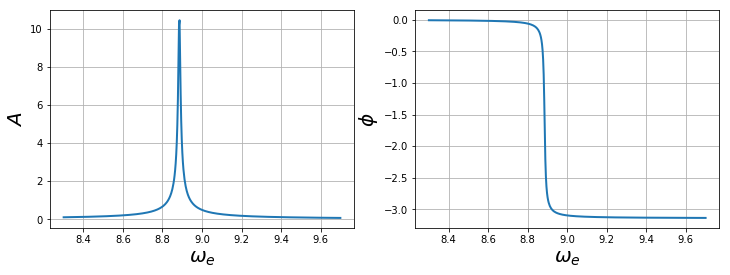

In [7]:
matplotlib.rcParams['figure.figsize'] = (12,4)

omegae = np.linspace(8.3,9.7,500)

plt.subplot(1, 2, 2)
plt.plot(omegae, dephasages(15,0.19,0.002,1), '-', lw=2)
plt.xlabel('$\omega_e$',fontsize=20)
plt.ylabel('$\phi$',fontsize=20)
plt.grid(True)


plt.subplot(1, 2, 1)
plt.plot(omegae, amplitudes(15,0.19,0.002,1), '-', lw=2)
plt.xlabel('$\omega_e$',fontsize=20)
plt.ylabel('$A$',fontsize=20)


plt.grid(True)
plt.show()


# Oscilateur modèle dans l'eau. 
$b_l=0.3$

In [8]:
interact(osciplot2,omegae=(8.5,9.5,.1),k=fixed(15),m=fixed(0.19),bl=fixed(0.3),f=fixed(1),xzero=fixed(0),vzero=fixed(0),tmin=(0,60,5),tmax=(0,60,5))

interactive(children=(FloatSlider(value=9.0, description='omegae', max=9.5, min=8.5), IntSlider(value=30, description='tmin', max=60, step=5), IntSlider(value=30, description='tmax', max=60, step=5), Output()), _dom_classes=('widget-interact',))

<function __main__.osciplot2>

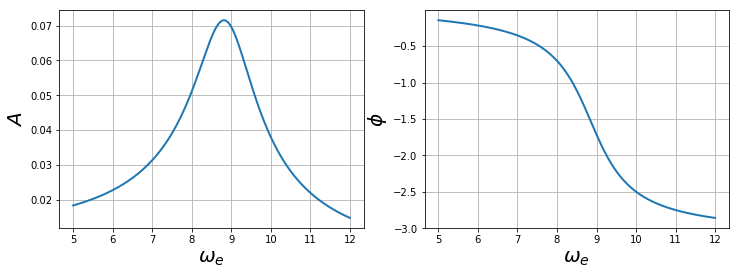

In [9]:
matplotlib.rcParams['figure.figsize'] = (12,4)

omegae = np.linspace(5,12,500)

plt.subplot(1, 2, 2)
plt.plot(omegae, dephasages(15,0.19,0.3,1), '-', lw=2)
plt.xlabel('$\omega_e$',fontsize=20)
plt.ylabel('$\phi$',fontsize=20)
plt.grid(True)


plt.subplot(1, 2, 1)
plt.plot(omegae, amplitudes(15,0.19,0.3,1), '-', lw=2)
plt.xlabel('$\omega_e$',fontsize=20)
plt.ylabel('$A$',fontsize=20)


plt.grid(True)
plt.show()

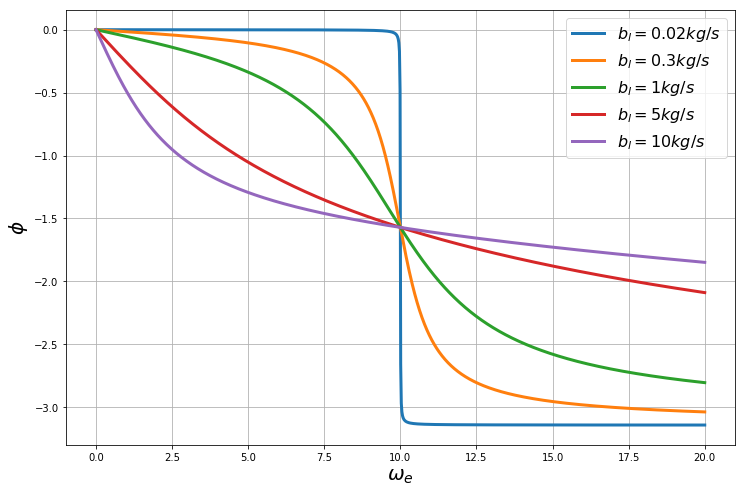

In [10]:
matplotlib.rcParams['figure.figsize'] = (12,8)

#def dephasages(k,m,bl,f):
omegae = np.linspace(0,20,1000)


plt.plot(omegae,dephasages(19,0.19,0.002,1),lw=3,label='$b_l=0.02 kg/s$')
plt.plot(omegae,dephasages(19,.19,0.3,1),lw=3,label='$b_l=0.3 kg/s$')
plt.plot(omegae,dephasages(19,.19,1,1),lw=3,label='$b_l=1 kg/s$')
plt.plot(omegae,dephasages(19,.19,5,1),lw=3,label='$b_l=5 kg/s$')
plt.plot(omegae,dephasages(19,.19,10,1),lw=3,label='$b_l=10 kg/s$')
plt.xlabel('$\omega_e$',fontsize=20)
plt.ylabel('$\phi$',fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()


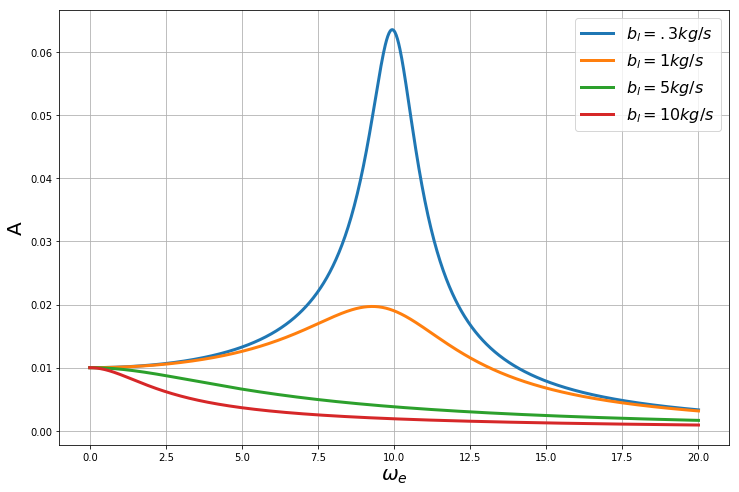

In [11]:
matplotlib.rcParams['figure.figsize'] = (12,8)

#def dephasages(k,m,bl,f):
omegae = np.linspace(0,20,1000)


plt.plot(omegae,amplitudes(19,0.19,0.3,1),lw=3,label='$b_l=.3 kg/s$')
plt.plot(omegae,amplitudes(19,.19,1,1),lw=3,label='$b_l=1 kg/s$')
plt.plot(omegae,amplitudes(19,.19,5,1),lw=3,label='$b_l=5 kg/s$')
plt.plot(omegae,amplitudes(19,.19,10,1),lw=3,label='$b_l=10 kg/s$')
#plt.plot(omegae,amplitudes(19,.19,0.1,1),lw=3,label='$b_l=80 kg/s$')
plt.xlabel('$\omega_e$',fontsize=20)
plt.ylabel('A',fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()
